In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import keras
import pandas as pd

In [ ]:
# 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/DL_TeamProject/data/trajectory_dataset_transformed.csv')
data = data.iloc[:, :4]  # 데이터의 첫 4개 열만 사용

# 입력 데이터와 타겟 데이터로 나누기
input_data = []
target_data = []

# 각 id 그룹에 대해 반복
for group_id in data['id'].unique():
    group_data = data[data['id'] == group_id].reset_index(drop=False)
    num_samples = len(group_data) # group_datat : 각 id에 대하는 좌표들의 갯수


    # 각 그룹 내에서 5개의 연속된 데이터를 입력으로, 그 다음 데이터의 좌표를 타겟으로 사용
    for i in range(5, num_samples):
        input_data.append(group_data.iloc[i-5:i][['x', 'y','t']].to_numpy())
        target_data.append(group_data.iloc[i][['x', 'y','t']].to_numpy())

# numpy 배열로 변환
input_data = np.array(input_data)
target_data = np.array(target_data)

# 학습용과 검증용으로 데이터를 나눔
train_input, test_input, train_target, test_target = train_test_split(input_data, target_data, test_size=0.2, random_state=42)

In [85]:
# LSTM 모델 만들기
model = Sequential()
model.add(LSTM(32, input_shape=(5, 3), return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(3))

# 모델 컴파일
model.compile(loss='mse', optimizer='adam')

# EarlyStopping 콜백 설정
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# 모델 학습
history = model.fit(input_data, target_data, epochs=1000, batch_size=16, validation_split=0.2)

Epoch 1/1000
482/482 [==============================] - 10s 9ms/step - loss: 499.9683 - val_loss: 302.3762
Epoch 2/1000
482/482 [==============================] - 4s 8ms/step - loss: 229.9755 - val_loss: 194.4965
Epoch 3/1000
482/482 [==============================] - 4s 8ms/step - loss: 115.9238 - val_loss: 109.1400
Epoch 4/1000
482/482 [==============================] - 4s 8ms/step - loss: 59.5926 - val_loss: 60.5839
Epoch 5/1000
482/482 [==============================] - 3s 7ms/step - loss: 31.7277 - val_loss: 34.1258
Epoch 6/1000
482/482 [==============================] - 4s 9ms/step - loss: 17.9298 - val_loss: 20.9729
Epoch 7/1000
482/482 [==============================] - 4s 7ms/step - loss: 11.0192 - val_loss: 12.6098
Epoch 8/1000
482/482 [==============================] - 4s 7ms/step - loss: 7.3240 - val_loss: 9.0765
Epoch 9/1000
482/482 [==============================] - 4s 8ms/step - loss: 5.3518 - val_loss: 6.6025
Epoch 10/1000
482/482 [==============================] - 4s 9

In [93]:
# 모델 저장
model.save('/content/drive/MyDrive/DL_TeamProject/data/model/my_model.h5')

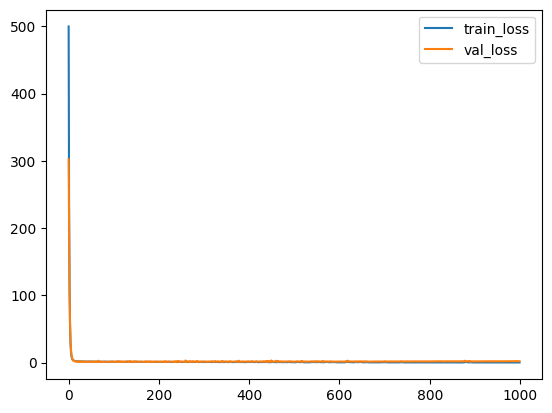

In [87]:
# 학습 과정 시각화
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.      history['val_loss'], label='val_loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 120ms/step


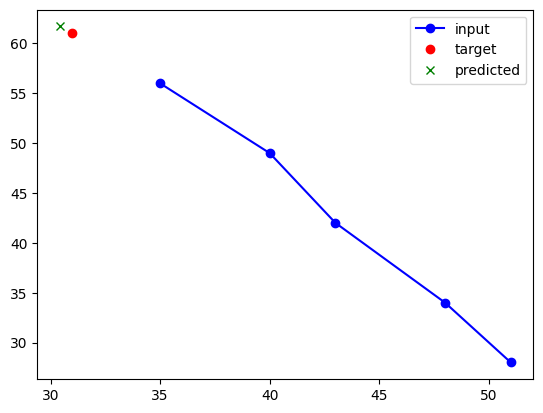

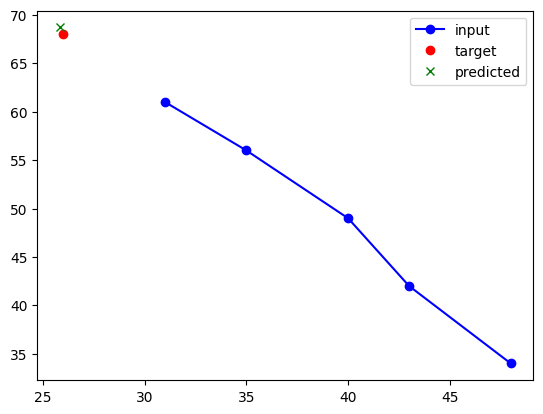

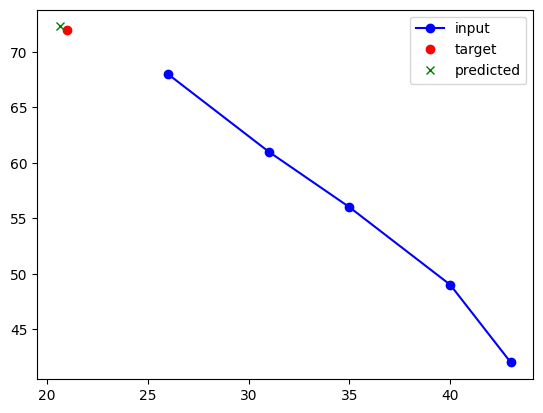

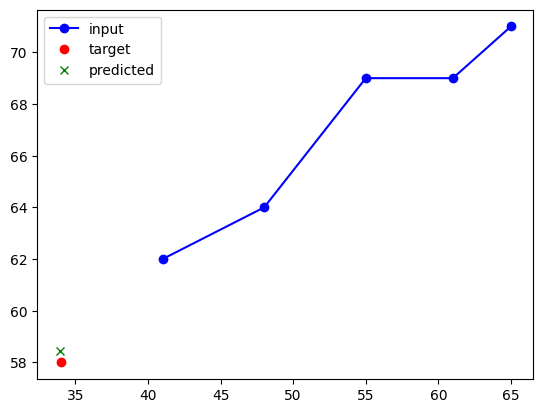

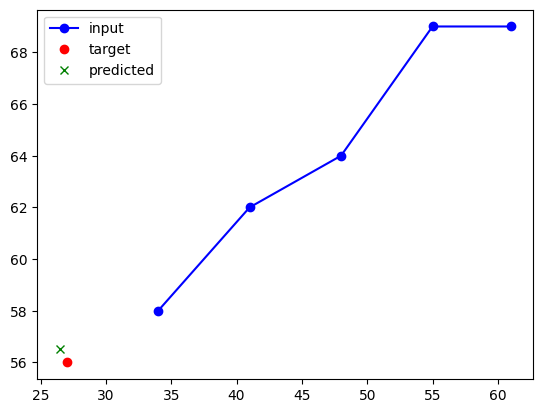

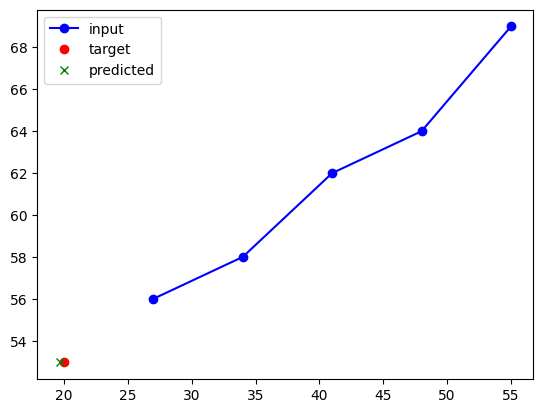

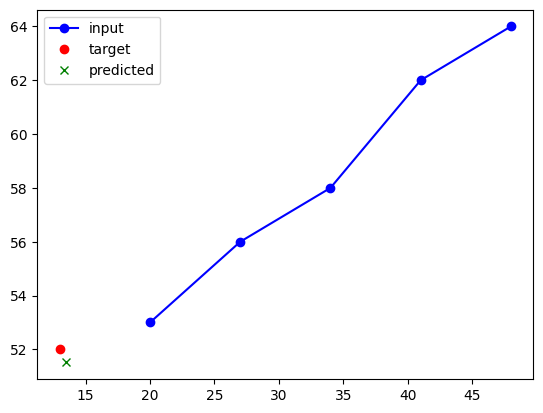

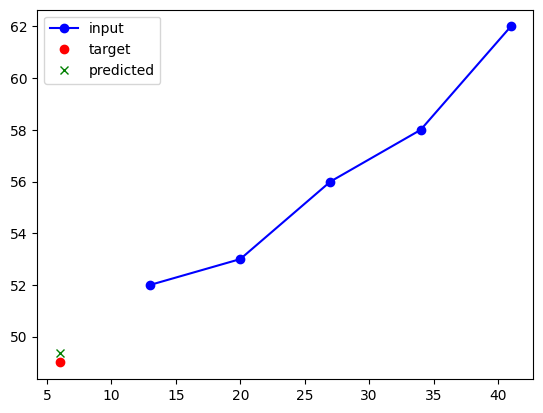

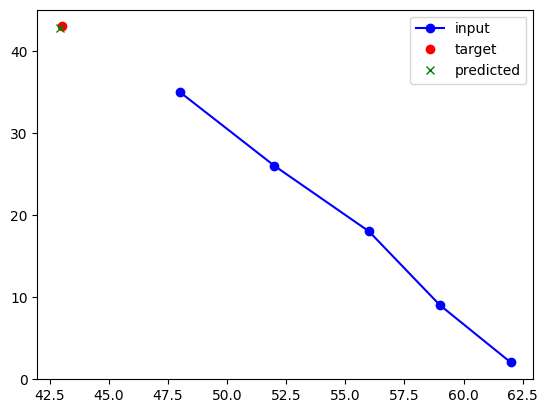

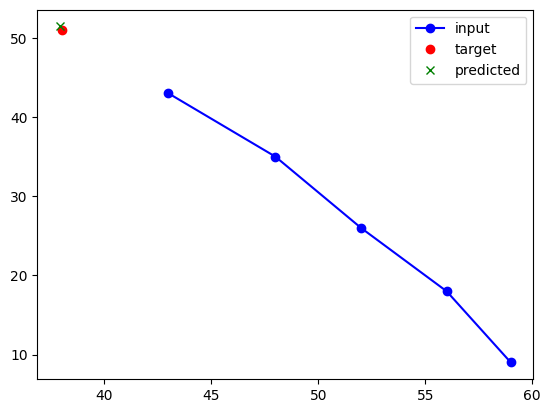

In [94]:
# 테스트 데이터 예측
test_input = input_data[10:30]
test_target = target_data[10:30]
predicted = model.predict(test_input)

# 예측 결과 시각화
for i in range(10):
    plt.plot(test_input[i, :, 0], test_input[i, :, 1], 'bo-', label='input')
    plt.plot(test_target[i, 0], test_target[i, 1], 'ro', label='target')
    plt.plot(predicted[i, 0], predicted[i, 1], 'gx', label='predicted')
    plt.legend()
    plt.show()